In [2]:
# Add the direcotry of DataSynthesizer into sys.path before importing the code
import os, sys
module_dir = os.getcwd() + '/DataSynthesizer/'
sys.path.append(module_dir)

print(f'Adding into sys.path: {module_dir}')

Adding into sys.path: /home/yh2860/notebooks/notes/jds405/data_synthesizer/DataSynthesizer/


In [3]:
from DataDescriber import DataDescriber
from DataGenerator import DataGenerator
from ModelInspector import ModelInspector

In [4]:
describer = DataDescriber()
generator = DataGenerator()

## Generating 8 datasets

In [5]:
from lib.utils import read_json_file

import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## hw_compass

In [216]:
sensitive_data_file = './hw_data/hw_compas.csv'
description_files = {'random mode':                   './out/description(random).json', 
                     'independent attribute mode':    './out/description(independent).json', 
                     'correlated attribute mode':     './out/description(correlated).json',
                     'ex_correlated attribute mode':  './out/describtion(ex_correlated).json'}
synthetic_data_files = {'random mode':                './out/synthetic data(random).csv', 
                        'independent attribute mode': './out/synthetic data(independent).csv', 
                        'correlated attribute mode':  './out/synthetic data(correlated).csv',
                        'ex_correlated attribute mode': './out/synthetic data(ex_correlated).csv'}


output_data_size = 10000

In [217]:
real_data = pd.read_csv(sensitive_data_file)
real_data.head()

,sex,age,race,score
0,Male,69,Other,1
1,Male,31,Caucasian,5
2,Male,34,African-American,3
3,Male,24,African-American,4
4,Male,23,African-American,8


### random mode

In [218]:
describer.describe_dataset_in_random_mode(sensitive_data_file)
describer.save_dataset_description_to_file(description_files['random mode'])

In [219]:
generator.generate_dataset_in_random_mode(n=output_data_size, 
                                          description_file=description_files['random mode'], 
                                          seed=0, 
                                          minimum=0, 
                                          maximum=100)

In [220]:
generator.save_synthetic_data(synthetic_data_files['random mode'])

In [221]:
synthetic_random = pd.read_csv(synthetic_data_files['random mode'])

### indy mode

In [222]:
describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=0.1)
describer.save_dataset_description_to_file(description_files['independent attribute mode'])
generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                               description_file=description_files['independent attribute mode'], 
                                               seed=1)
generator.save_synthetic_data(synthetic_data_files['independent attribute mode'])
synthetic_independent = pd.read_csv(synthetic_data_files['independent attribute mode'])

### corr mode 1

In [223]:
describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                        epsilon=0.1, 
                                                        k=1)
from lib.utils import display_bayesian_network
display_bayesian_network(describer.bayesian_network)
describer.save_dataset_description_to_file(description_files['correlated attribute mode'])
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                        description_file=description_files['correlated attribute mode'],
                                                        seed=3)
generator.save_synthetic_data(synthetic_data_files['correlated attribute mode'])
synthetic_correlated = pd.read_csv(synthetic_data_files['correlated attribute mode'])
synthetic_correlated.head()


================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].


,sex,age,race,score
0,Male,27.0,African-American,4
1,Male,24.0,Hispanic,1
2,Male,23.0,Caucasian,5
3,Male,28.0,African-American,9
4,Male,24.0,African-American,9


### corr mode 2

In [224]:
describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                        epsilon=0.1, 
                                                        k=2)
display_bayesian_network(describer.bayesian_network)
describer.save_dataset_description_to_file(description_files['ex_correlated attribute mode'])
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                        description_file=description_files['ex_correlated attribute mode'],
                                                        seed=5)
generator.save_synthetic_data(synthetic_data_files['ex_correlated attribute mode'])
synthetic_correlated = pd.read_csv(synthetic_data_files['ex_correlated attribute mode'])
synthetic_correlated.head()

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'score'].


,sex,age,race,score
0,Male,28.0,African-American,8
1,Male,64.0,Caucasian,1
2,Male,37.0,Caucasian,6
3,Male,29.0,African-American,2
4,Male,33.0,Caucasian,6


## hw_fake

In [225]:
sensitive_data_file = './hw_data/hw_fake.csv'
description_files = {'random mode':                   './out/fk_description(random).json', 
                     'independent attribute mode':    './out/fk_description(independent).json', 
                     'correlated attribute mode':     './out/fk_description(correlated).json',
                     'ex_correlated attribute mode':  './out/fk_describtion(ex_correlated).json'}
synthetic_data_files = {'random mode':                './out/fk_synthetic data(random).csv', 
                        'independent attribute mode': './out/fk_synthetic data(independent).csv', 
                        'correlated attribute mode':  './out/fk_synthetic data(correlated).csv',
                        'ex_correlated attribute mode': './out/fk_synthetic data(ex_correlated).csv'}


output_data_size = 10000

### random mode

In [226]:
describer.describe_dataset_in_random_mode(sensitive_data_file)
describer.save_dataset_description_to_file(description_files['random mode'])
generator.generate_dataset_in_random_mode(n=output_data_size, 
                                          description_file=description_files['random mode'], 
                                          seed=6, 
                                          minimum=0, 
                                          maximum=100)
generator.save_synthetic_data(synthetic_data_files['random mode'])
synthetic_random = pd.read_csv(synthetic_data_files['random mode'])

### indy mode

In [227]:
describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=0.1)
describer.save_dataset_description_to_file(description_files['independent attribute mode'])
generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                               description_file=description_files['independent attribute mode'], 
                                               seed=7)
generator.save_synthetic_data(synthetic_data_files['independent attribute mode'])
synthetic_independent = pd.read_csv(synthetic_data_files['independent attribute mode'])

### corr mode 1

In [228]:
describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                        epsilon=0.1, 
                                                        k=1)
from lib.utils import display_bayesian_network
display_bayesian_network(describer.bayesian_network)
describer.save_dataset_description_to_file(description_files['correlated attribute mode'])
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                        description_file=description_files['correlated attribute mode'],
                                                        seed=8)
generator.save_synthetic_data(synthetic_data_files['correlated attribute mode'])
synthetic_correlated = pd.read_csv(synthetic_data_files['correlated attribute mode'])
synthetic_correlated.head()

================ Constructing Bayesian Network (BN) ================
Adding ROOT parent_1
Adding attribute parent_2
Adding attribute child_2
Adding attribute child_1
========================== BN constructed ==========================
Constructed Bayesian network:
    parent_2 has parents ['parent_1'].
    child_2  has parents ['parent_2'].
    child_1  has parents ['parent_1'].


,parent_1,parent_2,child_1,child_2
0,2,0,2,0
1,2,1,0,1
2,2,2,0,2
3,1,1,2,1
4,0,1,2,1


### corr mode 2

In [229]:
describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                        epsilon=0.1, 
                                                        k=2)
display_bayesian_network(describer.bayesian_network)
describer.save_dataset_description_to_file(description_files['ex_correlated attribute mode'])
generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                        description_file=description_files['ex_correlated attribute mode'],
                                                        seed=9)
generator.save_synthetic_data(synthetic_data_files['ex_correlated attribute mode'])
synthetic_correlated = pd.read_csv(synthetic_data_files['ex_correlated attribute mode'])
synthetic_correlated.head()

================ Constructing Bayesian Network (BN) ================
Adding ROOT parent_1
Adding attribute parent_2
Adding attribute child_2
Adding attribute child_1
========================== BN constructed ==========================
Constructed Bayesian network:
    parent_2 has parents ['parent_1'].
    child_2  has parents ['parent_2', 'parent_1'].
    child_1  has parents ['parent_2', 'parent_1'].


,parent_1,parent_2,child_1,child_2
0,0,0,0,0
1,1,1,1,1
2,1,0,0,1
3,0,0,0,0
4,0,1,0,1


# Q1

In [230]:
sensitive_data_file = './hw_data/hw_compas.csv'
description_files = {'random mode':                   './out/description(random).json', 
                     'independent attribute mode':    './out/description(independent).json', 
                     'correlated attribute mode':     './out/description(correlated).json',
                     'ex_correlated attribute mode':  './out/describtion(ex_correlated).json'}
synthetic_data_files = {'random mode':                './out/synthetic data(random).csv', 
                        'independent attribute mode': './out/synthetic data(independent).csv', 
                        'correlated attribute mode':  './out/synthetic data(correlated).csv',
                        'ex_correlated attribute mode': './out/synthetic data(ex_correlated).csv'}


output_data_size = 10000

In [231]:
df = pd.read_csv('out/synthetic data(random).csv')
print ('Mean: '+str(df['age'].mean()))
print ('Median: '+str(df['age'].median()))
print ('Min: '+str(df['age'].min()))
print ('Max: '+str(df['age'].max()))

Mean: 50.3008
Median: 50.0
Min: 0
Max: 100


In [232]:
print ('Mean: '+str(df['score'].mean()))
print ('Median: '+str(df['score'].median()))
print ('Min: '+str(df['score'].min()))
print ('Max: '+str(df['score'].max()))

Mean: 4.9073
Median: 5.0
Min: -1
Max: 10


In [233]:
df = pd.read_csv('out/synthetic data(independent).csv')
print ('Mean: '+str(df['age'].mean()))
print ('Median: '+str(df['age'].median()))
print ('Min: '+str(df['age'].min()))
print ('Max: '+str(df['age'].max()))

Mean: 37.146
Median: 33.0
Min: 18.0
Max: 95.0


In [234]:
print ('Mean: '+str(df['score'].mean()))
print ('Median: '+str(df['score'].median()))
print ('Min: '+str(df['score'].min()))
print ('Max: '+str(df['score'].max()))

Mean: 4.3271
Median: 4.0
Min: -1
Max: 10


In [235]:
df = pd.read_csv('out/synthetic data(correlated).csv')
print ('Mean: '+str(df['age'].mean()))
print ('Median: '+str(df['age'].median()))
print ('Min: '+str(df['age'].min()))
print ('Max: '+str(df['age'].max()))

Mean: 35.4044
Median: 32.0
Min: 18.0
Max: 95.0


In [236]:
print ('Mean: '+str(df['score'].mean()))
print ('Median: '+str(df['score'].median()))
print ('Min: '+str(df['score'].min()))
print ('Max: '+str(df['score'].max()))

Mean: 4.3769
Median: 4.0
Min: -1
Max: 10


In [237]:
df = pd.read_csv('out/synthetic data(ex_correlated).csv')
print ('Mean: '+str(df['age'].mean()))
print ('Median: '+str(df['age'].median()))
print ('Min: '+str(df['age'].min()))
print ('Max: '+str(df['age'].max()))

Mean: 35.1127
Median: 32.0
Min: 18.0
Max: 87.0


In [238]:
print ('Mean: '+str(df['score'].mean()))
print ('Median: '+str(df['score'].median()))
print ('Min: '+str(df['score'].min()))
print ('Max: '+str(df['score'].max()))

Mean: 4.4378
Median: 4.0
Min: -1
Max: 10


### ground truth

In [239]:
df = pd.read_csv('hw_data/hw_compas.csv')
print ('Mean: '+str(df['age'].mean()))
print ('Median: '+str(df['age'].median()))
print ('Min: '+str(df['age'].min()))
print ('Max: '+str(df['age'].max()))

Mean: 35.14331887386238
Median: 32.0
Min: 18
Max: 96


In [240]:
print ('Mean: '+str(df['score'].mean()))
print ('Median: '+str(df['score'].median()))
print ('Min: '+str(df['score'].min()))
print ('Max: '+str(df['score'].max()))

Mean: 4.371268180658332
Median: 4.0
Min: -1
Max: 10


# Q2
### random mode

In [241]:
real_data = pd.read_csv('hw_data/hw_compas.csv')
synthetic_random = pd.read_csv('out/synthetic data(random).csv')

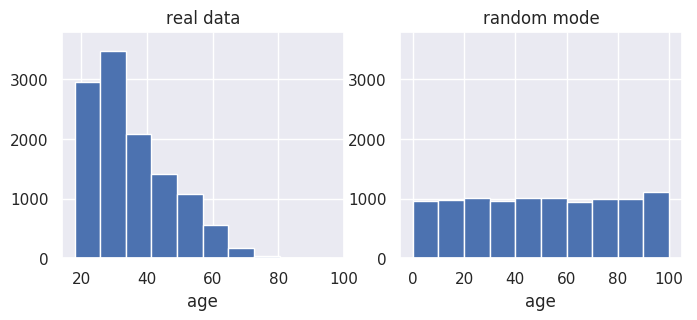

In [257]:
real_data = pd.read_csv('hw_data/hw_compas.csv')
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_random['age'])
axes[0].set_ylim([0, 3800])
axes[1].set_ylim([0, 3800])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_title('real data')
axes[1].set_title('random mode');

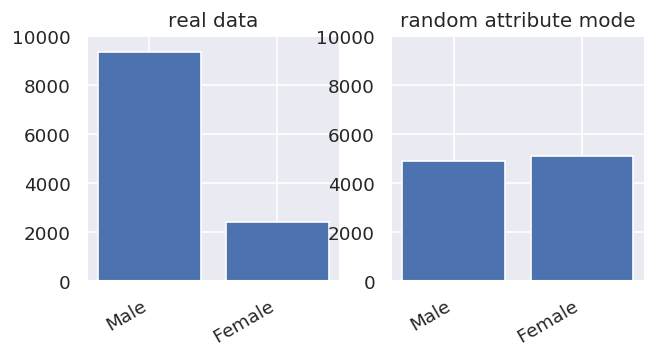

In [258]:
sex_real = real_data['sex'].value_counts()
sex_random = synthetic_random['sex'].value_counts()
relationship_both = pd.merge(sex_real.to_frame(), 
                             sex_random.to_frame(), 
                             left_index=True, 
                             right_index=True, 
                             suffixes=('_real', '_random_attribute_mode'))

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['sex_real'])
axes[1].bar(relationship_both.index, relationship_both['sex_random_attribute_mode'])
axes[0].set_ylim([0, 10000])
axes[1].set_ylim([0, 10000])
axes[0].set_title('real data')
axes[1].set_title('random attribute mode')
fig.autofmt_xdate()

### independent mode

In [244]:
real_data = pd.read_csv('hw_data/hw_compas.csv')
synthetic_independent = pd.read_csv('out/synthetic data(independent).csv')


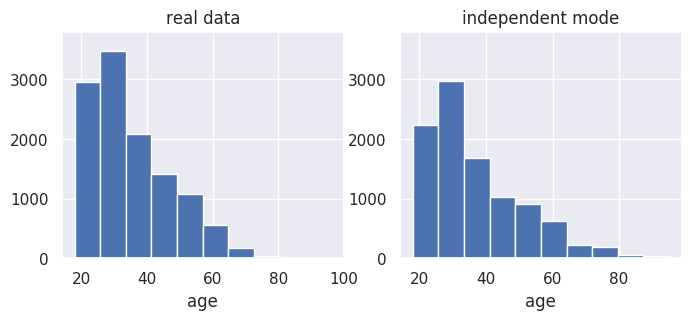

In [259]:
real_data = pd.read_csv('hw_data/hw_compas.csv')
fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)
axes[0].hist(real_data['age'])
axes[1].hist(synthetic_independent['age'])
axes[0].set_xlabel('age')
axes[1].set_xlabel('age')
axes[0].set_ylim([0, 3800])
axes[1].set_ylim([0, 3800])
axes[0].set_title('real data')
axes[1].set_title('independent mode');

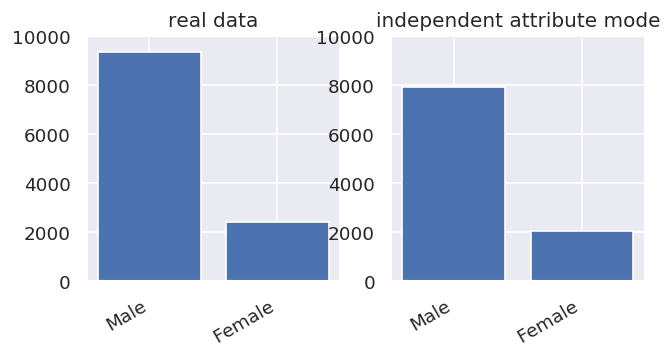

In [260]:
sex_real = real_data['sex'].value_counts()
sex_independent = synthetic_independent['sex'].value_counts()
relationship_both = pd.merge(sex_real.to_frame(), 
                             sex_independent.to_frame(), 
                             left_index=True, 
                             right_index=True, 
                             suffixes=('_real', '_independent_attribute_mode'))

fig, axes = plt.subplots(1, 2, figsize=(6,3), dpi=120)
axes[0].bar(relationship_both.index, relationship_both['sex_real'])
axes[1].bar(relationship_both.index, relationship_both['sex_independent_attribute_mode'])
axes[0].set_ylim([0, 10000])
axes[1].set_ylim([0, 10000])
axes[0].set_title('real data')
axes[1].set_title('independent attribute mode')
fig.autofmt_xdate()

## Two-sample Kolmogorov–Smirnov test

In [247]:
from scipy.stats import ks_2samp

In [248]:
def ks_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for Two-sample Kolmogorov–Smirnov test.
    """
    return ks_2samp(df_in[attr], df_out[attr])[0]

In [249]:
real_data = pd.read_csv('hw_data/hw_compas.csv')
synthetic_random = pd.read_csv('out/synthetic data(random).csv')
synthetic_indy = pd.read_csv('out/synthetic data(independent).csv')

In [250]:
# real vs random
ks_test(real_data, synthetic_random, 'age')

0.373353049247257

In [251]:
# real vs indy
ks_test(real_data, synthetic_indy, 'age')

0.0518091775112699

## KL-divergence

In [51]:
from scipy.stats import entropy

In [49]:
def get_distribution_of_categorical_attribute(attribute: pd.Series, indicies=None):
    distribution = attribute.dropna().value_counts()
    if indicies is not None:
        for idx in set(indicies) - set(distribution.index):
            distribution.loc[idx] = 0
    distribution.sort_index(inplace=True)
    return distribution/sum(distribution)

def kl_test(df_in: pd.DataFrame, df_out: pd.DataFrame, attr: str):
    """
    df_in: the sensitive dataset
    df_out: the synthetic dataset
    attr: the attribute that will be calculated for KL-divergence.
    """
    distribution_in = get_distribution_of_categorical_attribute(df_in[attr])
    distribution_out = get_distribution_of_categorical_attribute(df_out[attr], distribution_in.index)
    return entropy(distribution_out, distribution_in)

In [254]:
kl_test(real_data, synthetic_random, 'sex')

0.22388927416119944

In [255]:
kl_test(real_data, synthetic_indy, 'sex')

1.2082092357907953e-09

## Q3

In [63]:
sensitive_data_file = './hw_data/hw_fake.csv'
description_files = {'random mode':                   './out/fk_description(random).json', 
                     'independent attribute mode':    './out/fk_description(independent).json', 
                     'correlated attribute mode':     './out/fk_description(correlated).json',
                     'ex_correlated attribute mode':  './out/fk_describtion(ex_correlated).json'}
synthetic_data_files = {'random mode':                './out/fk_synthetic data(random).csv', 
                        'independent attribute mode': './out/fk_synthetic data(independent).csv', 
                        'correlated attribute mode':  './out/fk_synthetic data(correlated).csv',
                        'ex_correlated attribute mode': './out/fk_synthetic data(ex_correlated).csv'}


output_data_size = 10000

### corr mode 1

In [66]:
real_data = pd.read_csv('hw_data/hw_fake.csv')
synthetic_correlated = pd.read_csv('out/fk_synthetic data(correlated).csv')

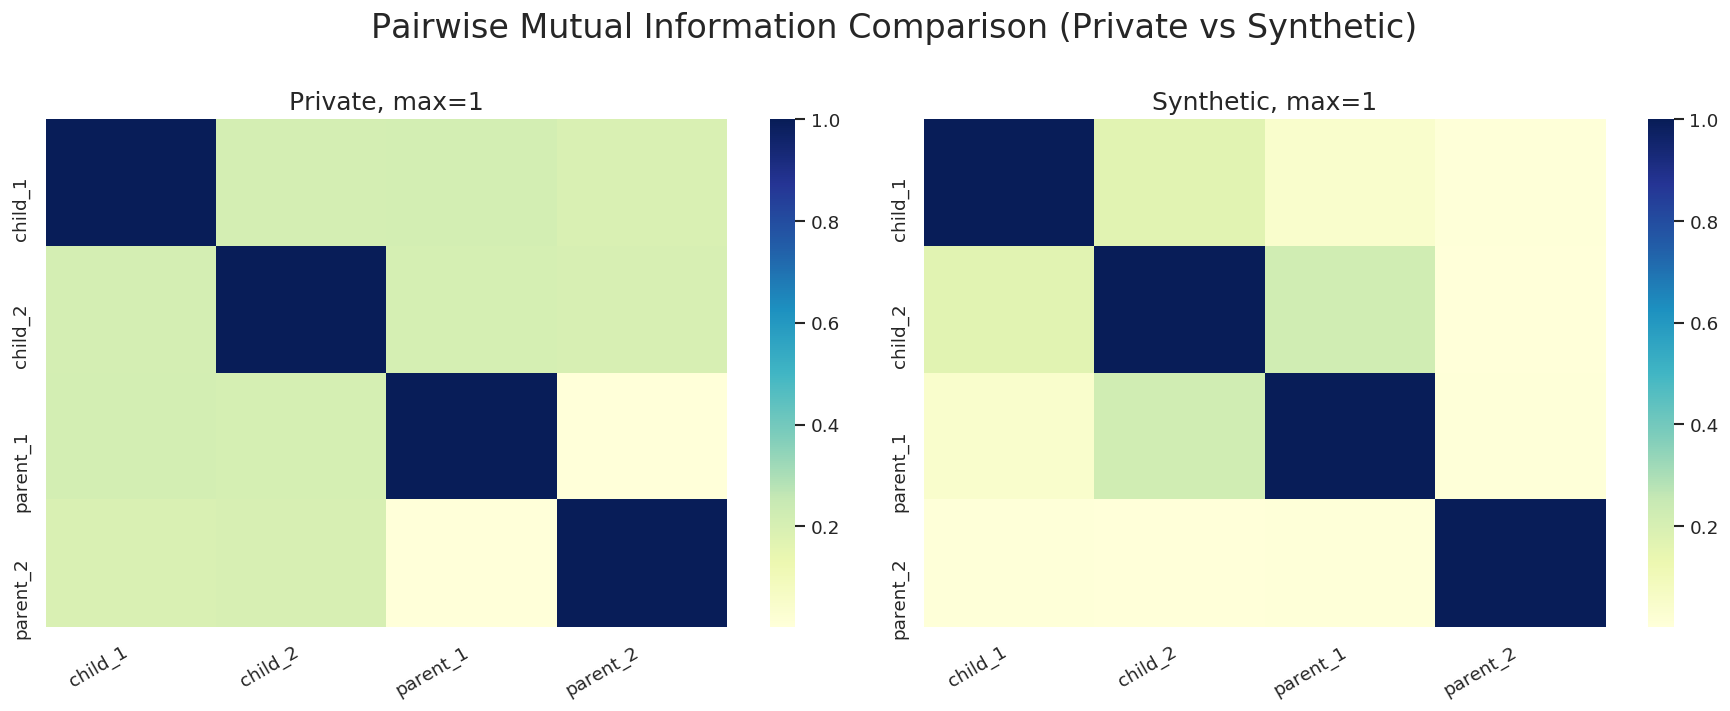

In [67]:
attribute_description = read_json_file(description_files['correlated attribute mode'])['attribute_description']
ModelInspector(real_data, 
               synthetic_correlated, 
               attribute_description).mutual_information_heatmap()

### corr mode 2

In [68]:
real_data = pd.read_csv('hw_data/hw_fake.csv')
synthetic_correlated = pd.read_csv('out/fk_synthetic data(ex_correlated).csv')

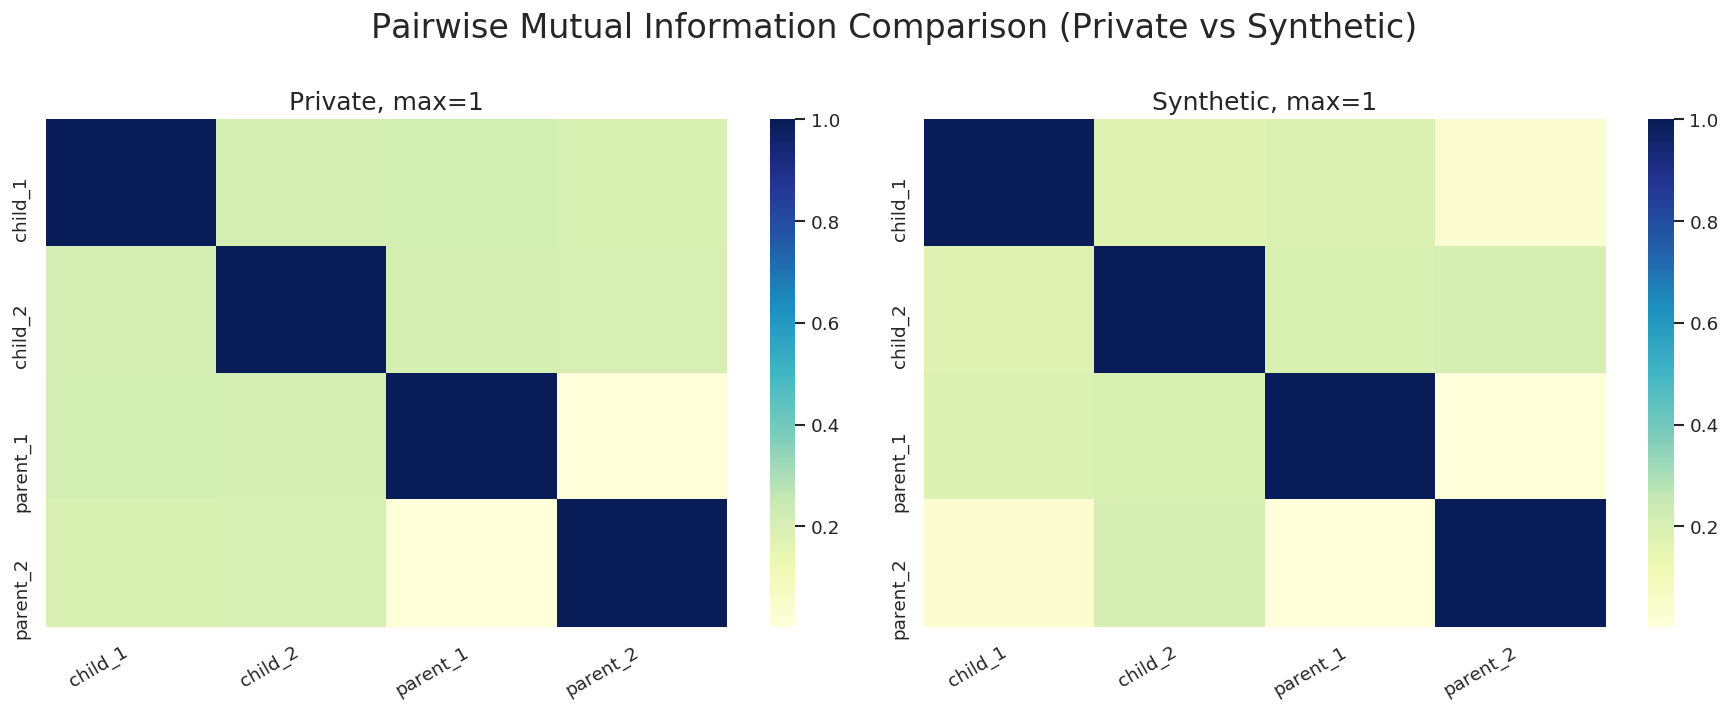

In [69]:
attribute_description = read_json_file(description_files['ex_correlated attribute mode'])['attribute_description']
ModelInspector(real_data, 
               synthetic_correlated, 
               attribute_description).mutual_information_heatmap()

# Goal 2

In [261]:
import seaborn as sns

In [264]:
sensitive_data_file = './hw_data/hw_compas.csv'
description_files = {'random mode0':                   './out/g2/description(random)0.json',
                     'random mode1':                   './out/g2/description(random)1.json',
                     'random mode2':                   './out/g2/description(random)2.json',
                     'random mode3':                   './out/g2/description(random)3.json',
                     'random mode4':                   './out/g2/description(random)4.json',
                     'random mode5':                   './out/g2/description(random)5.json',
                     'random mode6':                   './out/g2/description(random)6.json',
                     'random mode7':                   './out/g2/description(random)7.json',
                     'random mode8':                   './out/g2/description(random)8.json',
                     'random mode9':                   './out/g2/description(random)9.json',
                     'independent attribute mode0':    './out/g2/description(independent)0.json',
                     'independent attribute mode1':    './out/g2/description(independent)1.json',
                     'independent attribute mode2':    './out/g2/description(independent)2.json',
                     'independent attribute mode3':    './out/g2/description(independent)3.json',
                     'independent attribute mode4':    './out/g2/description(independent)4.json',
                     'independent attribute mode5':    './out/g2/description(independent)5.json',
                     'independent attribute mode6':    './out/g2/description(independent)6.json',
                     'independent attribute mode7':    './out/g2/description(independent)7.json',
                     'independent attribute mode8':    './out/g2/description(independent)8.json',
                     'independent attribute mode9':    './out/g2/description(independent)9.json',
                     'correlated attribute mode0':     './out/g2/description(correlated)0.json',
                     'correlated attribute mode1':     './out/g2/description(correlated)1.json',
                     'correlated attribute mode2':     './out/g2/description(correlated)2.json',
                     'correlated attribute mode3':     './out/g2/description(correlated)3.json',
                     'correlated attribute mode4':     './out/g2/description(correlated)4.json',
                     'correlated attribute mode5':     './out/g2/description(correlated)5.json',
                     'correlated attribute mode6':     './out/g2/description(correlated)6.json',
                     'correlated attribute mode7':     './out/g2/description(correlated)7.json',
                     'correlated attribute mode8':     './out/g2/description(correlated)8.json',
                     'correlated attribute mode9':     './out/g2/description(correlated)9.json'}
synthetic_data_files = {'random mode0':                './out/g2/synthetic data(random)0.csv', 
                        'independent attribute mode0': './out/g2/synthetic data(independent)0.csv', 
                        'correlated attribute mode0':  './out/g2/synthetic data(correlated)0.csv',
                        'random mode1':                './out/g2/synthetic data(random)1.csv', 
                        'independent attribute mode1': './out/g2/synthetic data(independent)1.csv', 
                        'correlated attribute mode1':  './out/g2/synthetic data(correlated)1.csv',
                        'random mode2':                './out/g2/synthetic data(random)2.csv', 
                        'independent attribute mode2': './out/g2/synthetic data(independent)2.csv', 
                        'correlated attribute mode2':  './out/g2/synthetic data(correlated)2.csv',
                        'random mode3':                './out/g2/synthetic data(random)3.csv', 
                        'independent attribute mode3': './out/g2/synthetic data(independent)3.csv', 
                        'correlated attribute mode3':  './out/g2/synthetic data(correlated)3.csv',
                        'random mode4':                './out/g2/synthetic data(random)4.csv', 
                        'independent attribute mode4': './out/g2/synthetic data(independent)4.csv', 
                        'correlated attribute mode4':  './out/g2/synthetic data(correlated)4.csv',
                        'random mode5':                './out/g2/synthetic data(random)5.csv', 
                        'independent attribute mode5': './out/g2/synthetic data(independent)5.csv', 
                        'correlated attribute mode5':  './out/g2/synthetic data(correlated)5.csv',
                        'random mode6':                './out/g2/synthetic data(random)6.csv', 
                        'independent attribute mode6': './out/g2/synthetic data(independent)6.csv', 
                        'correlated attribute mode6':  './out/g2/synthetic data(correlated)6.csv',
                        'random mode7':                './out/g2/synthetic data(random)7.csv', 
                        'independent attribute mode7': './out/g2/synthetic data(independent)7.csv', 
                        'correlated attribute mode7':  './out/g2/synthetic data(correlated)7.csv',
                        'random mode8':                './out/g2/synthetic data(random)8.csv', 
                        'independent attribute mode8': './out/g2/synthetic data(independent)8.csv', 
                        'correlated attribute mode8':  './out/g2/synthetic data(correlated)8.csv',
                        'random mode9':                './out/g2/synthetic data(random)9.csv', 
                        'independent attribute mode9': './out/g2/synthetic data(independent)9.csv', 
                        'correlated attribute mode9':  './out/g2/synthetic data(correlated)9.csv'}


output_data_size = 10000

In [265]:
for i in range(10):
    # random mode
    describer.describe_dataset_in_random_mode(sensitive_data_file)
    describer.save_dataset_description_to_file(description_files['random mode'+str(i)])
    generator.generate_dataset_in_random_mode(n=output_data_size, 
                                          description_file=description_files['random mode'+str(i)], 
                                          seed=10+i, 
                                          minimum=0, 
                                          maximum=100)
    generator.save_synthetic_data(synthetic_data_files['random mode'+str(i)])
    synthetic_random = pd.read_csv(synthetic_data_files['random mode'+str(i)])
    
    # indy mode
    describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=0.1)
    describer.save_dataset_description_to_file(description_files['independent attribute mode'+str(i)])
    generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                                   description_file=description_files['independent attribute mode'+str(i)], 
                                                   seed=20+i)
    generator.save_synthetic_data(synthetic_data_files['independent attribute mode'+str(i)])
    synthetic_independent = pd.read_csv(synthetic_data_files['independent attribute mode'+str(i)])
    
    # corr mode
    describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                        epsilon=0.1, 
                                                        k=1)
    display_bayesian_network(describer.bayesian_network)
    describer.save_dataset_description_to_file(description_files['correlated attribute mode'+str(i)])
    generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                            description_file=description_files['correlated attribute mode'+str(i)],
                                                            seed=30+i)
    generator.save_synthetic_data(synthetic_data_files['correlated attribute mode'+str(i)])
    synthetic_correlated = pd.read_csv(synthetic_data_files['correlated attribute mode'+str(i)])

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex']

In [269]:
# random_ls = []
# corr_ls = []
# indy_ls = []
real_data = pd.read_csv('hw_data/hw_compas.csv')

# for i in range(10): 
random = []
corr = []
indy = []

path = 'out/g2/'

#     print (path)
for i in range(10):
    # random mode
    synthetic_random = pd.read_csv(path+'synthetic data(random)%s' % str(i)+'.csv')
    syn_kl = kl_test(real_data, synthetic_random, 'race')
    random.append(syn_kl)

    # corr mode 1
    synthetic_corr = pd.read_csv(path+'synthetic data(correlated)%s' % str(i)+'.csv')
    syn_kl = kl_test(real_data, synthetic_corr, 'race')
    corr.append(syn_kl)

    # independent mode
    synthetic_indy = pd.read_csv(path+'synthetic data(independent)%s' % str(i)+'.csv')
    syn_kl = kl_test(real_data, synthetic_indy, 'race')
    indy.append(syn_kl)
        
#     random_ls.append(random)
#     corr_ls.append(corr)
#     indy_ls.append(indy)
    

In [272]:
mode = 10*['random'] + 10*['correlated'] + 10*['independent']

kl = random + corr + indy

kl_ls = [('kl_divergence', kl),
         ('mode', mode)]

kl_df = pd.DataFrame.from_items(kl_ls)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


In [273]:
kl_df

,kl_divergence,mode
0,1.209283,random
1,1.225137,random
2,1.198577,random
3,1.199721,random
4,1.219623,random
5,1.254712,random
6,1.215734,random
7,1.180310,random
8,1.217364,random
9,1.224932,random


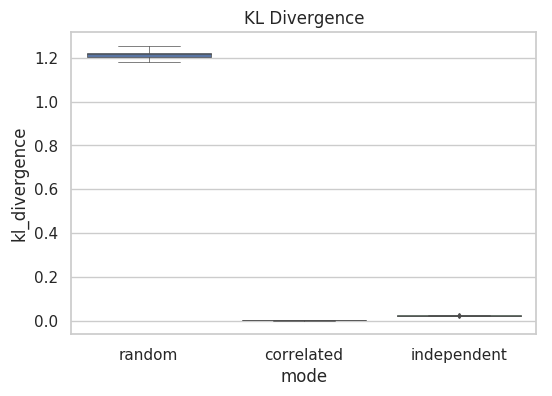

In [274]:
# real_data = pd.read_csv('hw_data/hw_compas.csv')
# sns.set(style="whitegrid")
# plt.figure(dpi=100)
# sns.boxplot(x=real_data['age'], linewidth=0.5, fliersize=2).set_title('Truth Value');

plt.figure(dpi=100)
# plt.ylim(0, 0.007)
sns.boxplot(x='mode', y='kl_divergence', data=kl_df, linewidth=0.5, fliersize=2).set_title('KL Divergence');
plt.savefig('out/g2/kl_divergence.png')

In [275]:
mode = 10*['correlated'] + 10*['independent']

kl = corr + indy

kl_ls = [('kl_divergence', kl),
         ('mode', mode)]

kl_df = pd.DataFrame.from_items(kl_ls)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


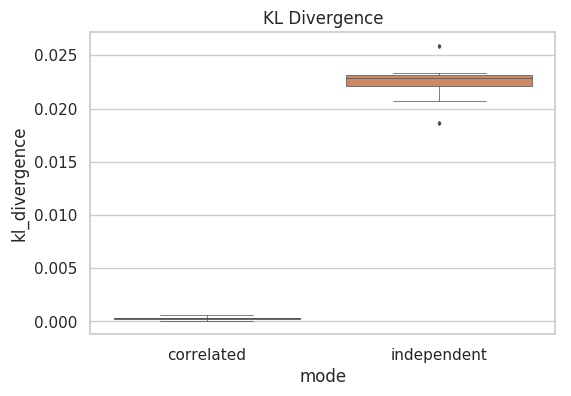

In [276]:
plt.figure(dpi=100)
# plt.ylim(0, 0.007)
sns.boxplot(x='mode', y='kl_divergence', data=kl_df, linewidth=0.5, fliersize=2).set_title('KL Divergence');
plt.savefig('out/g2/kl_divergence.png')

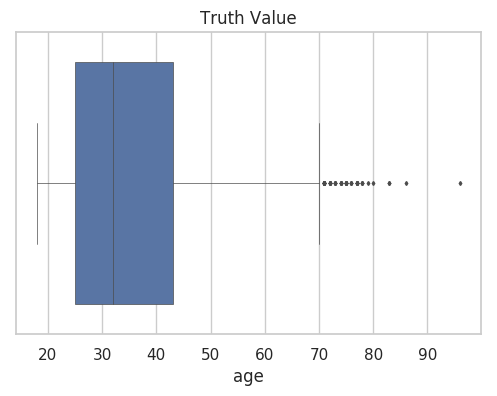

In [266]:
real_data = pd.read_csv('hw_data/hw_compas.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=real_data['age'], linewidth=0.5, fliersize=2).set_title('Truth Value');

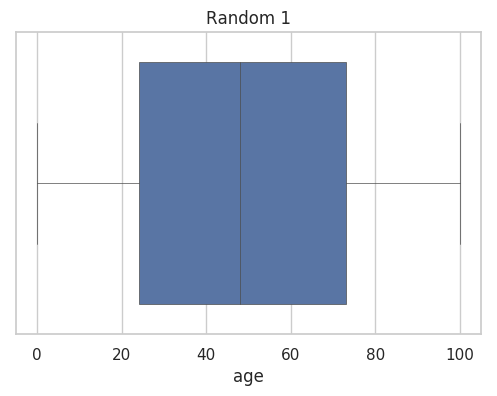

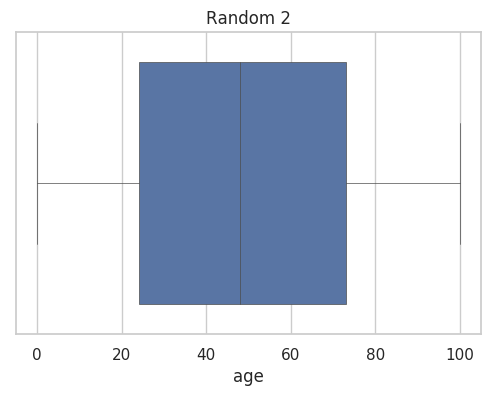

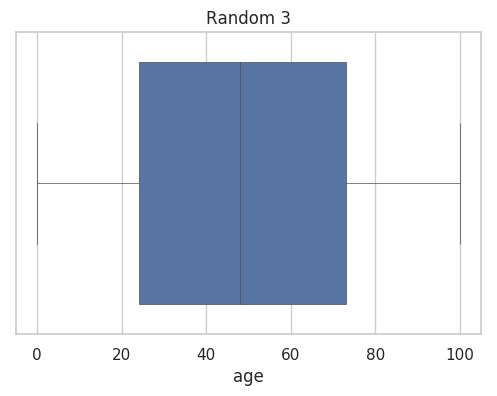

In [85]:
rand0 = pd.read_csv('out/g2/synthetic data(random)0.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=rand0['age'], linewidth=0.5, fliersize=2).set_title('Random 1');
rand1 = pd.read_csv('out/g2/synthetic data(random)1.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=rand1['age'], linewidth=0.5, fliersize=2).set_title('Random 2');
rand2 = pd.read_csv('out/g2/synthetic data(random)1.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=rand2['age'], linewidth=0.5, fliersize=2).set_title('Random 3');

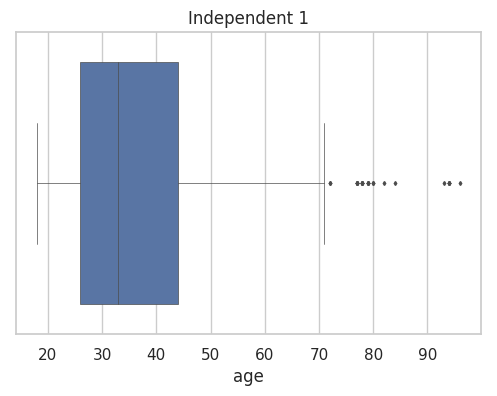

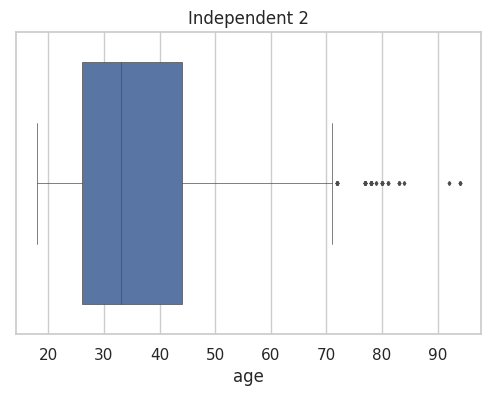

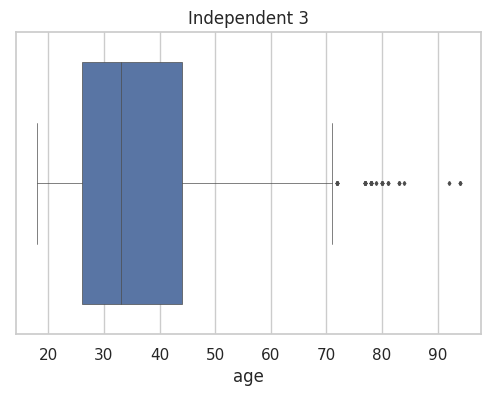

In [88]:
indy0 = pd.read_csv('out/g2/synthetic data(independent)0.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=indy0['age'], linewidth=0.5, fliersize=2).set_title('Independent 1');
indy1 = pd.read_csv('out/g2/synthetic data(independent)1.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=indy1['age'], linewidth=0.5, fliersize=2).set_title('Independent 2');
indy2 = pd.read_csv('out/g2/synthetic data(independent)1.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=indy2['age'], linewidth=0.5, fliersize=2).set_title('Independent 3');

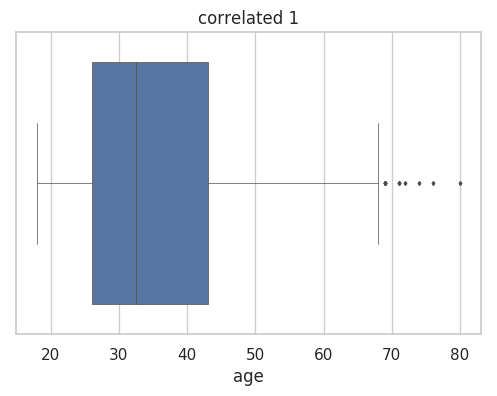

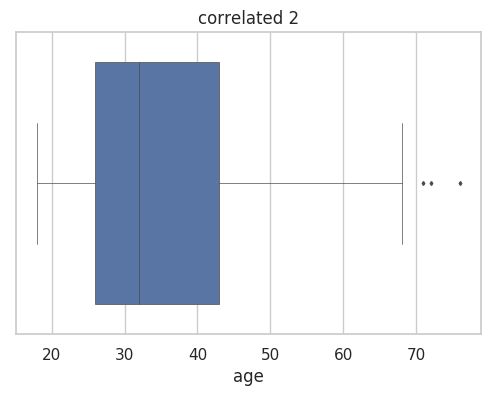

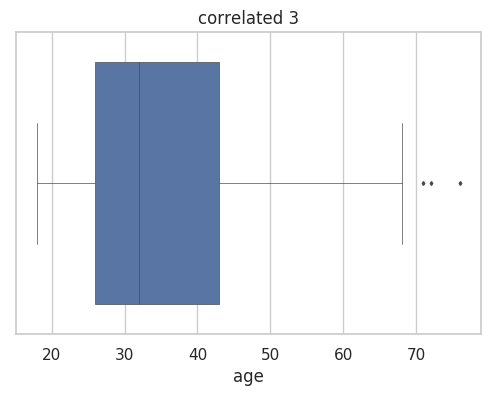

In [89]:
indy0 = pd.read_csv('out/g2/synthetic data(correlated)0.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=indy0['age'], linewidth=0.5, fliersize=2).set_title('correlated 1');
indy1 = pd.read_csv('out/g2/synthetic data(correlated)1.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=indy1['age'], linewidth=0.5, fliersize=2).set_title('correlated 2');
indy2 = pd.read_csv('out/g2/synthetic data(correlated)1.csv')
sns.set(style="whitegrid")
plt.figure(dpi=100)
sns.boxplot(x=indy2['age'], linewidth=0.5, fliersize=2).set_title('correlated 3');

# Goal 3
### K-L divergence

In [329]:
sensitive_data_file = './hw_data/hw_compas.csv'
description_files = {'independent attribute mode0':    '/description(independent)0.json',
                     'independent attribute mode1':    '/description(independent)1.json',
                     'independent attribute mode2':    '/description(independent)2.json',
                     'independent attribute mode3':    '/description(independent)3.json',
                     'independent attribute mode4':    '/description(independent)4.json',
                     'independent attribute mode5':    '/description(independent)5.json',
                     'independent attribute mode6':    '/description(independent)6.json',
                     'independent attribute mode7':    '/description(independent)7.json',
                     'independent attribute mode8':    '/description(independent)8.json',
                     'independent attribute mode9':    '/description(independent)9.json',
                     'correlated attribute mode0':     '/description(correlated)0.json',
                     'correlated attribute mode1':     '/description(correlated)1.json',
                     'correlated attribute mode2':     '/description(correlated)2.json',
                     'correlated attribute mode3':     '/description(correlated)3.json',
                     'correlated attribute mode4':     '/description(correlated)4.json',
                     'correlated attribute mode5':     '/description(correlated)5.json',
                     'correlated attribute mode6':     '/description(correlated)6.json',
                     'correlated attribute mode7':     '/description(correlated)7.json',
                     'correlated attribute mode8':     '/description(correlated)8.json',
                     'correlated attribute mode9':     '/description(correlated)9.json',
                     'ex_correlated attribute mode0':  '/describtion(ex_correlated)0.json',
                     'ex_correlated attribute mode1':  '/describtion(ex_correlated)1.json',
                     'ex_correlated attribute mode2':  '/describtion(ex_correlated)2.json',
                     'ex_correlated attribute mode3':  '/describtion(ex_correlated)3.json',
                     'ex_correlated attribute mode4':  '/describtion(ex_correlated)4.json',
                     'ex_correlated attribute mode5':  '/describtion(ex_correlated)5.json',
                     'ex_correlated attribute mode6':  '/describtion(ex_correlated)6.json',
                     'ex_correlated attribute mode7':  '/describtion(ex_correlated)7.json',
                     'ex_correlated attribute mode8':  '/describtion(ex_correlated)8.json',
                     'ex_correlated attribute mode9':  '/describtion(ex_correlated)9.json'}
synthetic_data_files = {'ex_correlated attribute mode0':                '/synthetic data(ex_correlated)0.csv', 
                        'independent attribute mode0': '/synthetic data(independent)0.csv', 
                        'correlated attribute mode0':  '/synthetic data(correlated)0.csv',
                        'ex_correlated attribute mode1':                '/synthetic data(ex_correlated)1.csv', 
                        'independent attribute mode1': '/synthetic data(independent)1.csv', 
                        'correlated attribute mode1':  '/synthetic data(correlated)1.csv',
                        'ex_correlated attribute mode2':                '/synthetic data(ex_correlated)2.csv', 
                        'independent attribute mode2': '/synthetic data(independent)2.csv', 
                        'correlated attribute mode2':  '/synthetic data(correlated)2.csv',
                        'ex_correlated attribute mode3':                '/synthetic data(ex_correlated)3.csv', 
                        'independent attribute mode3': '/synthetic data(independent)3.csv', 
                        'correlated attribute mode3':  '/synthetic data(correlated)3.csv',
                        'ex_correlated attribute mode4':                '/synthetic data(ex_correlated)4.csv', 
                        'independent attribute mode4': '/synthetic data(independent)4.csv', 
                        'correlated attribute mode4':  '/synthetic data(correlated)4.csv',
                        'ex_correlated attribute mode5':                '/synthetic data(ex_correlated)5.csv', 
                        'independent attribute mode5': '/synthetic data(independent)5.csv', 
                        'correlated attribute mode5':  '/synthetic data(correlated)5.csv',
                        'ex_correlated attribute mode6':                '/synthetic data(ex_correlated)6.csv', 
                        'independent attribute mode6': '/synthetic data(independent)6.csv', 
                        'correlated attribute mode6':  '/synthetic data(correlated)6.csv',
                        'ex_correlated attribute mode7':                '/synthetic data(ex_correlated)7.csv', 
                        'independent attribute mode7': '/synthetic data(independent)7.csv', 
                        'correlated attribute mode7':  '/synthetic data(correlated)7.csv',
                        'ex_correlated attribute mode8':                '/synthetic data(ex_correlated)8.csv', 
                        'independent attribute mode8': '/synthetic data(independent)8.csv', 
                        'correlated attribute mode8':  '/synthetic data(correlated)8.csv',
                        'ex_correlated attribute mode9':                '/synthetic data(ex_correlated)9.csv', 
                        'independent attribute mode9': '/synthetic data(independent)9.csv', 
                        'correlated attribute mode9':  '/synthetic data(correlated)9.csv'}


output_data_size = 10000

In [108]:
import os
cwd = os.getcwd()  
print ("The current working directory is %s" % cwd) 


for j in range(1,11):
    try:  
        path = cwd+"/out/g3/%s" % 'eps'+str(j*10**-2)
        os.mkdir(path)
    except OSError:  
        print ("Creation of the directory %s failed" % path)
    else:  
        print ("Successfully created the directory %s " % path)

The current working directory is /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3/eps0.09
Successfully created the directory /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3/eps0.01 
Successfully created the directory /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3/eps0.02 
Successfully created the directory /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3/eps0.03 
Successfully created the directory /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3/eps0.04 
Successfully created the directory /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3/eps0.05 
Successfully created the directory /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3/eps0.06 
Successfully created the directory /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3/eps0.07 
Successfully created the directory /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3/eps0.08 
Successfully created the directory /home/yh2860/notebooks/notes/jds

In [280]:
epsil = [i*10**-2 for i in range(1,11)]
# for j in range(1, 11): 
for j in epsil:
    for i in range(10):

        # indy mode
        describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=j)
        describer.save_dataset_description_to_file('out/g3/eps'+str(j)+description_files['independent attribute mode'+str(i)])
        generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                                       description_file='out/g3/eps'+str(j)+description_files['independent attribute mode'+str(i)], 
                                                       seed=20+i)
        generator.save_synthetic_data('out/g3/eps'+str(j)+synthetic_data_files['independent attribute mode'+str(i)])

        # corr mode 1
        describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                            epsilon=j, 
                                                            k=1)
        display_bayesian_network(describer.bayesian_network)
        describer.save_dataset_description_to_file('out/g3/eps'+str(j)+description_files['correlated attribute mode'+str(i)])
        generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                                description_file='out/g3/eps'+str(j)+description_files['correlated attribute mode'+str(i)],
                                                                seed=20+i)
        generator.save_synthetic_data('out/g3/eps'+str(j)+synthetic_data_files['correlated attribute mode'+str(i)])

        # corr mode 2
        describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                            epsilon=j, 
                                                            k=2)
        display_bayesian_network(describer.bayesian_network)
        describer.save_dataset_description_to_file('out/g3/eps'+str(j)+description_files['ex_correlated attribute mode'+str(i)])
        generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                                description_file='out/g3/eps'+str(j)+description_files['ex_correlated attribute mode'+str(i)],
                                                                seed=20+i)
        generator.save_synthetic_data('out/g3/eps'+str(j)+synthetic_data_files['ex_correlated attribute mode'+str(i)])
        
        
        

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has p

Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Networ

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has p

Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) =======

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has p

Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Networ

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has p

Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) =====

    race  has parents ['age', 'score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    

In [281]:
import os
cwd = os.getcwd()  
print ("The current working directory is %s" % cwd)
path = '/out/g3'
path = cwd + path
print ("Goal 3 data folder is %s" % path)

The current working directory is /home/yh2860/notebooks/notes/jds405/data_synthesizer
Goal 3 data folder is /home/yh2860/notebooks/notes/jds405/data_synthesizer/out/g3


In [52]:
excorr_ls = []
corr_ls = []
indy_ls = []
real_data = pd.read_csv('hw_data/hw_compas.csv')

for j in range(1, 11): 
    excorr = []
    corr = []
    indy = []
    
    ext = 'eps'+str(j*10**-2)+'/'
#     print (ext)
    path = 'out/g3/'
    path = path + ext
#     print (path)
    for i in range(10):
        # corr mode 2
        synthetic_excorr = pd.read_csv(path+'synthetic data(ex_correlated)%s' % str(i)+'.csv')
        syn_kl = kl_test(real_data, synthetic_excorr, 'race')
        excorr.append(syn_kl)

        # corr mode 1
        synthetic_corr = pd.read_csv(path+'synthetic data(correlated)%s' % str(i)+'.csv')
        syn_kl = kl_test(real_data, synthetic_corr, 'race')
        corr.append(syn_kl)

        # independent mode
        synthetic_indy = pd.read_csv(path+'synthetic data(independent)%s' % str(i)+'.csv')
        syn_kl = kl_test(real_data, synthetic_indy, 'race')
        indy.append(syn_kl)
        
    excorr_ls.append(excorr)
    corr_ls.append(corr)
    indy_ls.append(indy)
    
    

In [53]:
# flatten the list of lists

excorr_ls = [val for sublist in excorr_ls for val in sublist]
corr_ls = [val for sublist in corr_ls for val in sublist]
indy_ls = [val for sublist in indy_ls for val in sublist]


In [54]:
print (len(excorr_ls))
print (len(corr_ls))
print (len(indy_ls))

100
100
100


In [55]:
# eps = [i*10**-2 for i in range(1,11)]
# eps = 10*eps

eps = 10*[0.01]+10*[0.02]+10*[0.03]+10*[0.04]+10*[0.05]+10*[0.06]+10*[0.07]+10*[0.08]+10*[0.09]+10*[0.1]
len(eps)

100

In [56]:
# comparison = [('eps_0.01', eps0),
#               ('eps_0.02', eps1),
#               ('eps_0.03', eps2),
#               ('eps_0.04', eps3),
#               ('eps_0.05', eps4),
#               ('eps_0.06', eps5),
#               ('eps_0.07', eps6),
#               ('eps_0.08', eps7),
#               ('eps_0.09', eps8),
#               ('eps_0.1', eps9),
#               ('mode', mode)]

# comp_df = pd.DataFrame.from_items(comparison)

k2 = [('epsilon', eps),
      ('kl_k2', excorr_ls)]
k2_df = pd.DataFrame.from_items(k2)

k1 = [('epsilon', eps),
      ('kl_k1', corr_ls)]
k1_df = pd.DataFrame.from_items(k1)

indy = [('epsilon', eps),
      ('kl_indy', indy_ls)]
indy_df = pd.DataFrame.from_items(indy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


In [57]:
k2_df.head()

,epsilon,kl_k2
0,0.01,0.000160
1,0.01,0.000090
2,0.01,0.000095
3,0.01,0.000165
4,0.01,0.000360


In [58]:
k2_df.head()

,epsilon,kl_k2
0,0.01,0.000160
1,0.01,0.000090
2,0.01,0.000095
3,0.01,0.000165
4,0.01,0.000360


In [59]:
k1_df.head()

,epsilon,kl_k1
0,0.01,0.000210
1,0.01,0.000215
2,0.01,0.000077
3,0.01,0.000240
4,0.01,0.000107


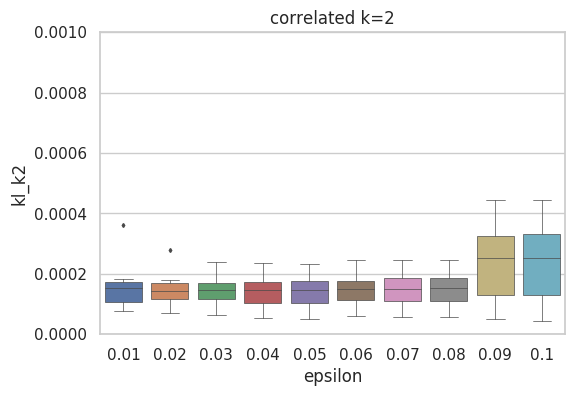

In [60]:
plt.figure(dpi=100)
sns.set(style="whitegrid")
plt.ylim(0, 0.001)
sns.boxplot(x='epsilon', y='kl_k2', data=k2_df, linewidth=0.5, fliersize=2).set_title('correlated k=2');
plt.savefig('out/g3/pics/kl/comparison/k2.png')

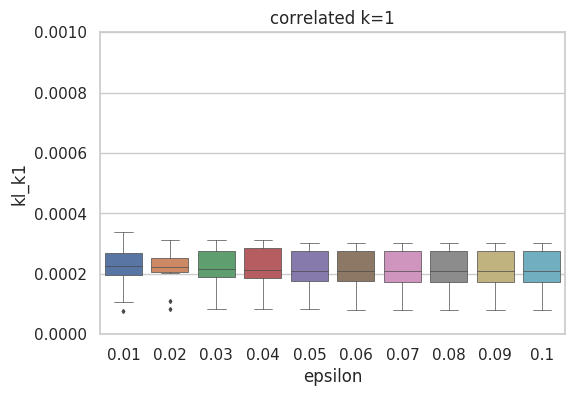

In [61]:
plt.figure(dpi=100)
plt.ylim(0, 0.001)
sns.boxplot(x='epsilon', y='kl_k1', data=k1_df, linewidth=0.5, fliersize=2).set_title('correlated k=1');
plt.savefig('out/g3/pics/kl/comparison/k1.png')

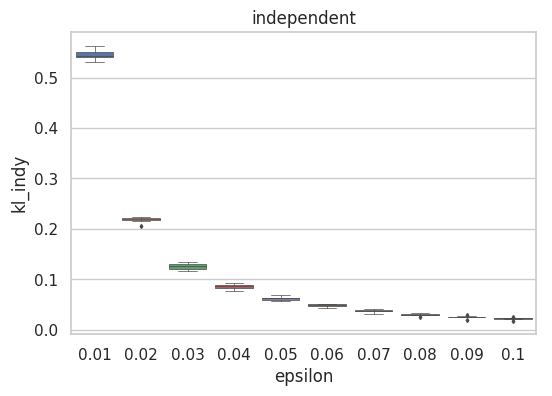

In [291]:
plt.figure(dpi=100)
# plt.ylim(0, 0.0065)
sns.boxplot(x='epsilon', y='kl_indy', data=indy_df, linewidth=0.5, fliersize=2).set_title('independent');
plt.savefig('out/g3/pics/kl/comparison/indy.png')

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


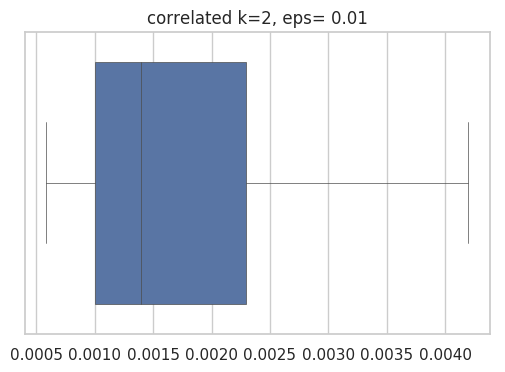

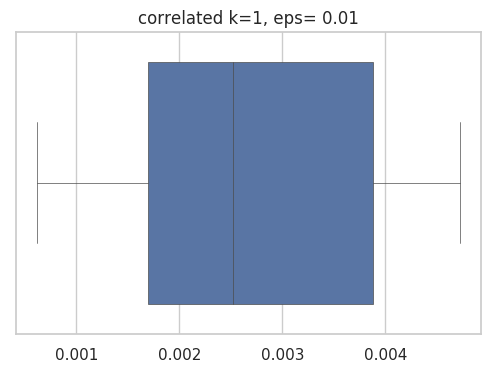

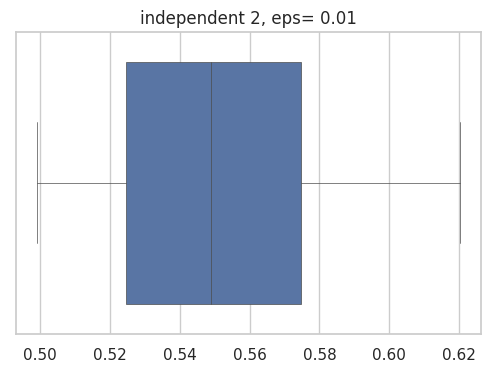

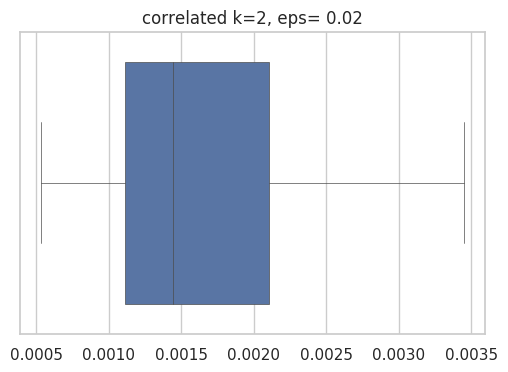

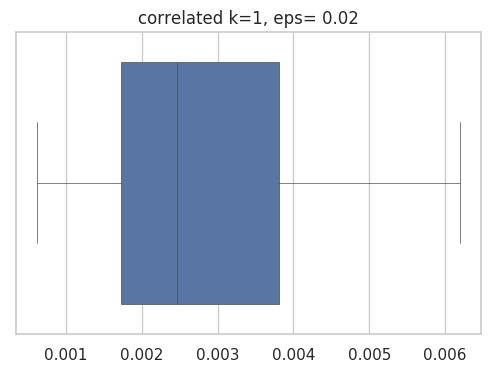

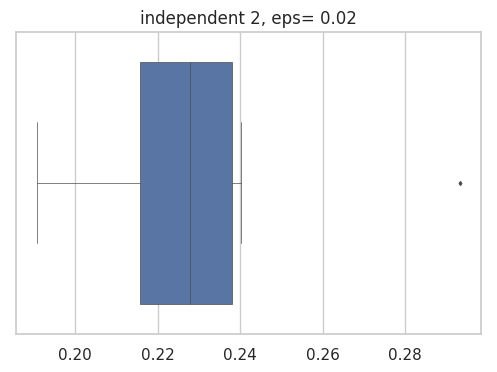

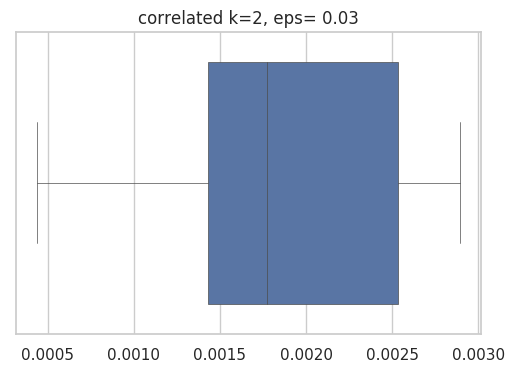

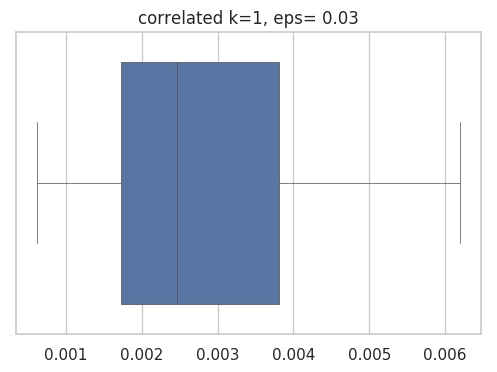

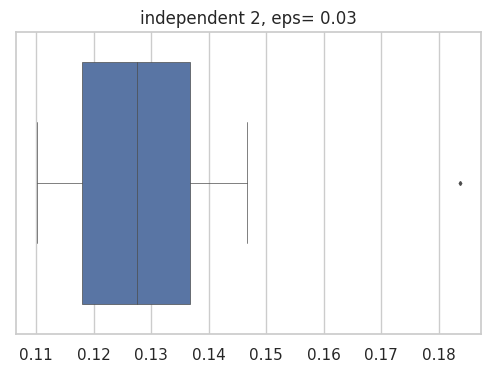

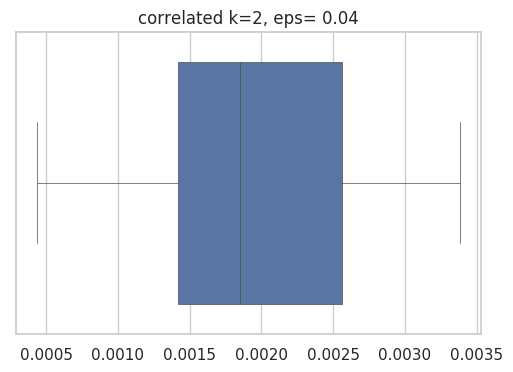

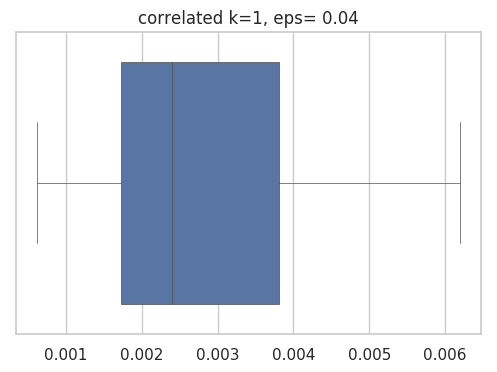

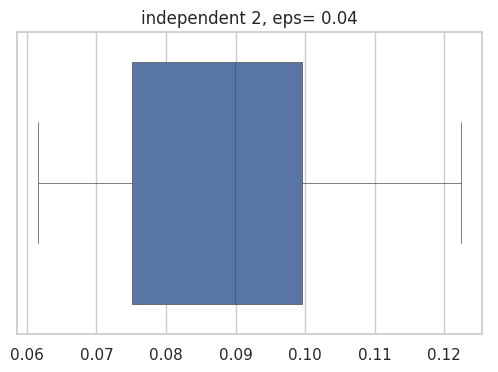

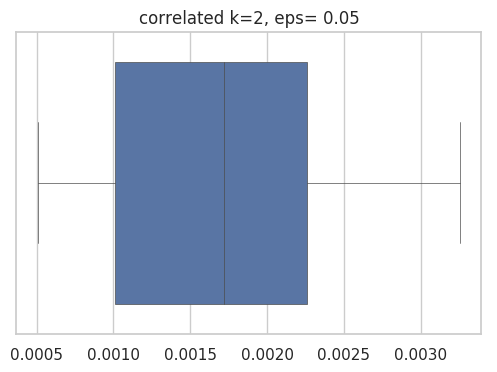

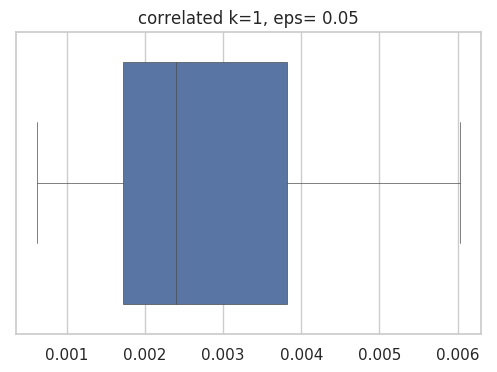

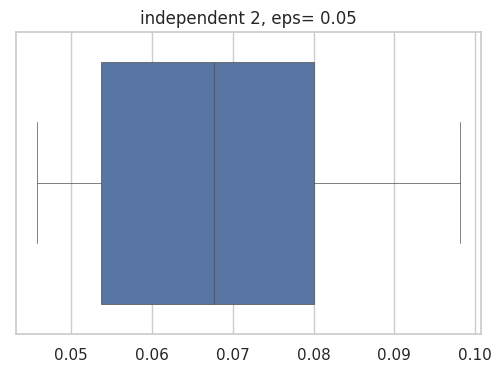

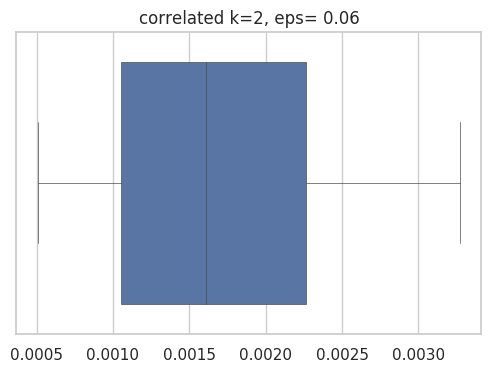

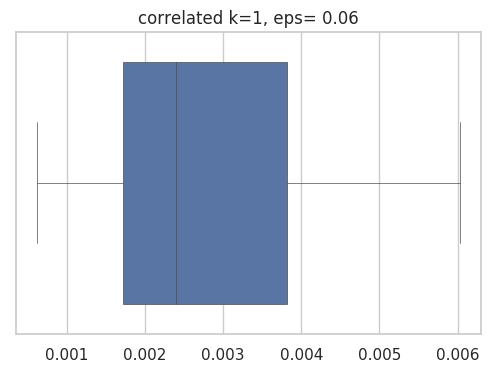

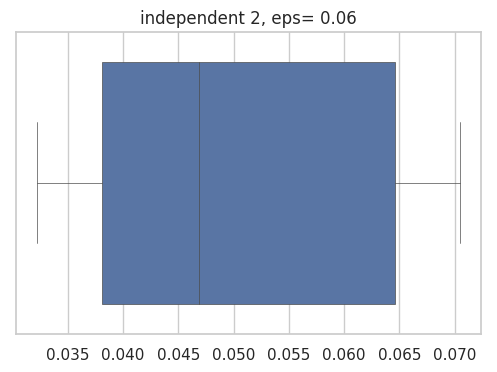

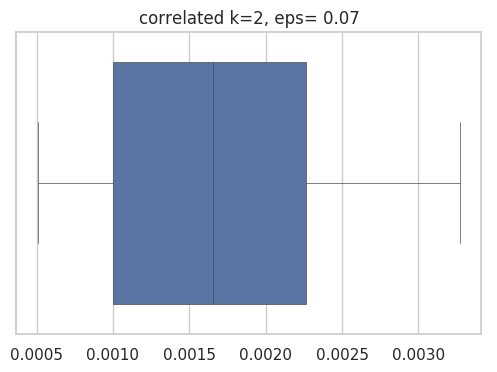

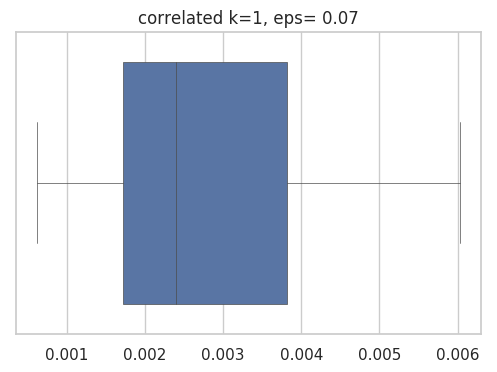

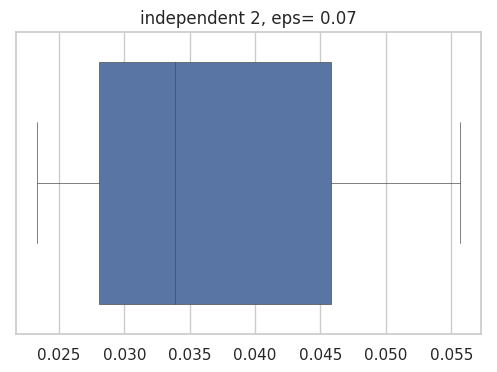

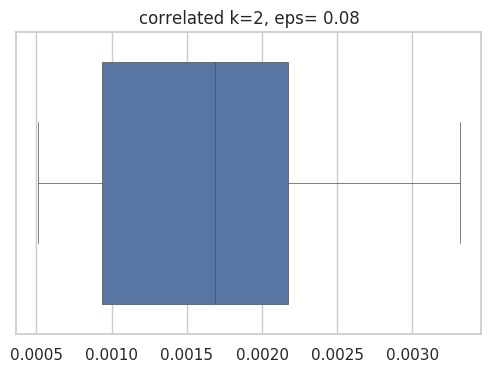

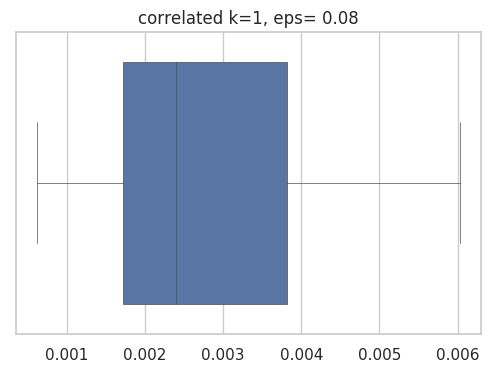

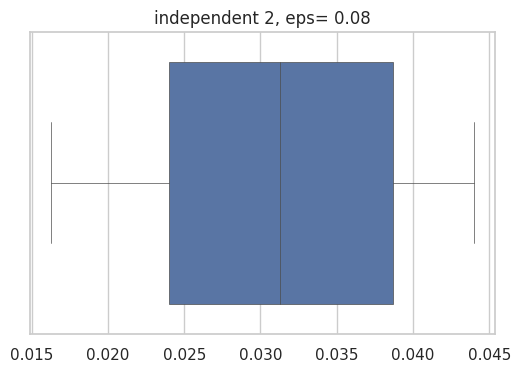

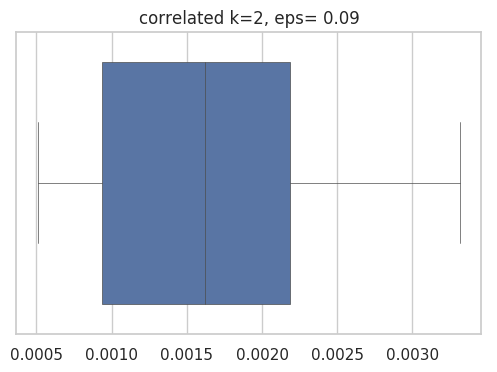

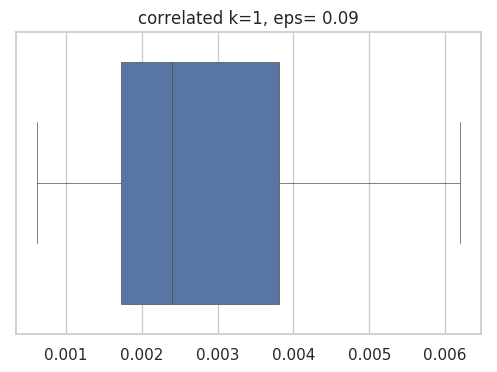

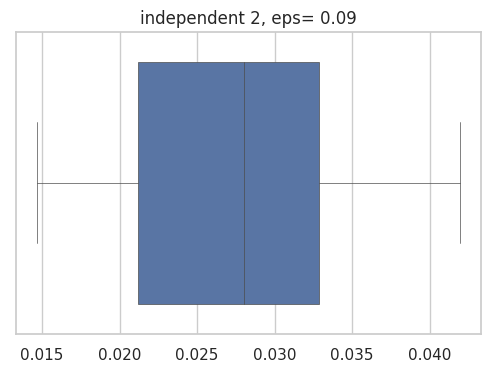

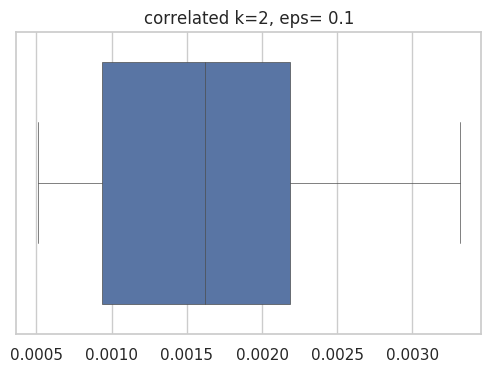

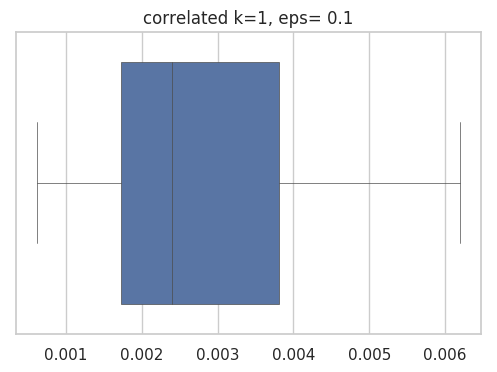

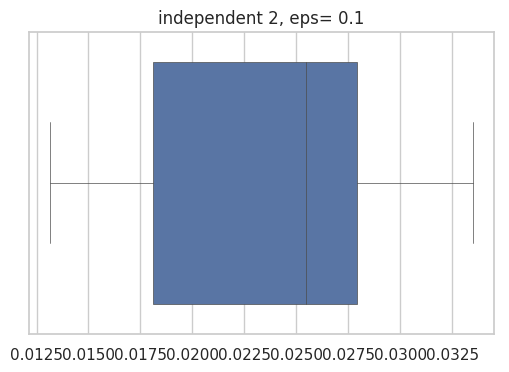

In [39]:
# import seaborn as sns

# for i in range(10):
#     sns.set(style="whitegrid")
#     plt.figure(dpi=100)
#     sns.boxplot(x=excorr_ls[i], linewidth=0.5, fliersize=2).set_title('correlated k=2, eps= %s' % str((i+1)*10**-2));
#     plt.savefig('out/g3/pics/kl/corr_k2_%s' % str((i+1)*10**-2) + '.png')
    
#     plt.figure(dpi=100)
#     sns.boxplot(x=corr_ls[i], linewidth=0.5, fliersize=2).set_title('correlated k=1, eps= %s' % str((i+1)*10**-2));
#     plt.savefig('out/g3/pics/kl/corr_k1_%s' % str((i+1)*10**-2) + '.png')  
    
#     plt.figure(dpi=100)
#     sns.boxplot(x=indy_ls[i], linewidth=0.5, fliersize=2).set_title('independent, eps= %s' % str((i+1)*10**-2));
#     plt.savefig('out/g3/pics/kl/indy_%s' % str((i+1)*10**-2) + '.png')    


# Goal 3
### Mutual information

In [95]:
from lib.utils import display_bayesian_network

epsilon = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
import os
cwd = os.getcwd()  
print ("The current working directory is %s" % cwd) 

The current working directory is /home/yh2860/notebooks/notes/jds405/data_synthesizer


## hw_compas data

In [316]:
sensitive_data_file = './hw_data/hw_compas.csv'
description_files = {'random mode':                   'description(random).json', 
                     'independent attribute mode':    'description(independent).json', 
                     'correlated attribute mode':     'description(correlated).json',
                     'ex_correlated attribute mode':  'describtion(ex_correlated).json'}
synthetic_data_files = {'random mode':                'synthetic data(random).csv', 
                        'independent attribute mode': 'synthetic data(independent).csv', 
                        'correlated attribute mode':  'synthetic data(correlated).csv',
                        'ex_correlated attribute mode': 'synthetic data(ex_correlated).csv'}


output_data_size = 10000

In [317]:
for j in epsilon: 
    for i in range(10):

        # indy mode
        describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=j)
        describer.save_dataset_description_to_file('out/g3/part_2/b/eps'+str(j)+'_'+str(i)+description_files['independent attribute mode'])
        generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                                       description_file='out/g3/part_2/b/eps'+str(j)+'_'+str(i)+description_files['independent attribute mode'], 
                                                       seed=100+i)
        generator.save_synthetic_data('out/g3/part_2/b/eps'+str(j)+'_'+str(i)+synthetic_data_files['independent attribute mode'])

        # corr mode 1
        describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                            epsilon=j, 
                                                            k=1)
        display_bayesian_network(describer.bayesian_network)
        describer.save_dataset_description_to_file('out/g3/part_2/c/eps'+str(j)+'_'+str(i)+description_files['correlated attribute mode'])
        generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                                description_file='out/g3/part_2/c/eps'+str(j)+'_'+str(i)+description_files['correlated attribute mode'],
                                                                seed=100+i)
        generator.save_synthetic_data('out/g3/part_2/c/eps'+str(j)+'_'+str(i)+synthetic_data_files['correlated attribute mode'])

        # corr mode 2
        describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                            epsilon=j, 
                                                            k=2)
        display_bayesian_network(describer.bayesian_network)
        describer.save_dataset_description_to_file('out/g3/part_2/d/eps'+str(j)+'_'+str(i)+description_files['ex_correlated attribute mode'])
        generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                                description_file='out/g3/part_2/d/eps'+str(j)+'_'+str(i)+description_files['ex_correlated attribute mode'],
                                                                seed=100+i)
        generator.save_synthetic_data('out/g3/part_2/d/eps'+str(j)+'_'+str(i)+synthetic_data_files['ex_correlated attribute mode'])
        
        
        

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has p

Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Networ

================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'sex'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has p

Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['sex'].
    race  has parents ['score'].
================ Constructing Baye

Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race


================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   h

/home/yh2860/notebooks/notes/jds405/data_synthesizer/DataSynthesizer/lib/PrivBayes.py:189: RuntimeWarning: overflow encountered in exp
  mi_array = np.exp(mi_array)


Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score', 'sex'].
    race  has parents ['age', 'score'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT sex
Adding attribute score
Adding attribute age
Adding attribute race
========================== BN constructed ==========================
Constructed Bayesian network:
    score has parents ['sex'].
    age   has parents ['score'].
    race  has parents ['score'].
================ Constructing Bayesian Network (BN) ================
Addin

## hw_fake data

In [15]:
sensitive_data_file = 'hw_data/hw_fake.csv'
description_files = {'random mode':                   'description(random).json', 
                     'independent attribute mode':    'description(independent).json', 
                     'correlated attribute mode':     'description(correlated).json',
                     'ex_correlated attribute mode':  'describtion(ex_correlated).json'}
synthetic_data_files = {'random mode':                'synthetic data(random).csv', 
                        'independent attribute mode': 'synthetic data(independent).csv', 
                        'correlated attribute mode':  'synthetic data(correlated).csv',
                        'ex_correlated attribute mode': 'synthetic data(ex_correlated).csv'}


output_data_size = 10000

In [19]:
for j in epsilon: 
    for i in range(10):

        # indy mode
        describer.describe_dataset_in_independent_attribute_mode(sensitive_data_file, epsilon=j)
        describer.save_dataset_description_to_file('out/g3/part_2/b_fk/eps'+str(j)+'_'+str(i)+description_files['independent attribute mode'])
        generator.generate_dataset_in_independent_mode(n=output_data_size, 
                                                       description_file='out/g3/part_2/b_fk/eps'+str(j)+'_'+str(i)+description_files['independent attribute mode'], 
                                                       seed=50+i)
        generator.save_synthetic_data('out/g3/part_2/b_fk/eps'+str(j)+'_'+str(i)+synthetic_data_files['independent attribute mode'])

        # corr mode 1
        describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                            epsilon=j, 
                                                            k=1)
        display_bayesian_network(describer.bayesian_network)
        describer.save_dataset_description_to_file('out/g3/part_2/c_fk/eps'+str(j)+'_'+str(i)+description_files['correlated attribute mode'])
        generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                                description_file='out/g3/part_2/c_fk/eps'+str(j)+'_'+str(i)+description_files['correlated attribute mode'],
                                                                seed=60+i)
        generator.save_synthetic_data('out/g3/part_2/c_fk/eps'+str(j)+'_'+str(i)+synthetic_data_files['correlated attribute mode'])

        # corr mode 2
        describer.describe_dataset_in_correlated_attribute_mode(sensitive_data_file, 
                                                            epsilon=j, 
                                                            k=2)
        from lib.utils import display_bayesian_network
        display_bayesian_network(describer.bayesian_network)
        describer.save_dataset_description_to_file('out/g3/part_2/d_fk/eps'+str(j)+'_'+str(i)+description_files['ex_correlated attribute mode'])
        generator.generate_dataset_in_correlated_attribute_mode(n=output_data_size, 
                                                                description_file='out/g3/part_2/d_fk/eps'+str(j)+'_'+str(i)+description_files['ex_correlated attribute mode'],
                                                                seed=70+i)
        generator.save_synthetic_data('out/g3/part_2/d_fk/eps'+str(j)+'_'+str(i)+synthetic_data_files['ex_correlated attribute mode'])
        
        
        

================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================
Constructed Bayesian network:
    parent_2 has parents ['child_2'].
    child_1  has parents ['parent_2', 'child_2'].
    parent_1 has parents ['parent_2', 'child_2'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================
Constructed Bayesian network:
    parent_2 has parents ['child_2'].
    child_1  has parents ['parent_2', 'child_2'].
    parent_1 has parents ['parent_2', 'child_2'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== B

Adding attribute parent_1
========================== BN constructed ==========================
Constructed Bayesian network:
    parent_2 has parents ['child_2'].
    child_1  has parents ['parent_2', 'child_2'].
    parent_1 has parents ['parent_2', 'child_2'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================
Constructed Bayesian network:
    parent_2 has parents ['child_2'].
    child_1  has parents ['parent_2', 'child_2'].
    parent_1 has parents ['parent_2', 'child_2'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================
Constructed Bayesian network:
    parent_2 has parents ['child_2'].
    child_1  has parents ['pare

================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================
Constructed Bayesian network:
    parent_2 has parents ['child_2'].
    child_1  has parents ['parent_2', 'child_2'].
    parent_1 has parents ['parent_2', 'child_2'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== BN constructed ==========================
Constructed Bayesian network:
    parent_2 has parents ['child_2'].
    child_1  has parents ['parent_2', 'child_2'].
    parent_1 has parents ['parent_2', 'child_2'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute parent_2
Adding attribute child_1
Adding attribute parent_1
========================== B

Adding attribute parent_2
========================== BN constructed ==========================
Constructed Bayesian network:
    child_1  has parents ['child_2'].
    parent_1 has parents ['child_1', 'child_2'].
    parent_2 has parents ['parent_1', 'child_2'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute child_1
Adding attribute parent_1
Adding attribute parent_2
========================== BN constructed ==========================
Constructed Bayesian network:
    child_1  has parents ['child_2'].
    parent_1 has parents ['child_1', 'child_2'].
    parent_2 has parents ['parent_1', 'child_2'].
================ Constructing Bayesian Network (BN) ================
Adding ROOT child_2
Adding attribute child_1
Adding attribute parent_1
Adding attribute parent_2
========================== BN constructed ==========================
Constructed Bayesian network:
    child_1  has parents ['child_2'].
    parent_1 has parents ['child_

In [7]:
from lib.utils import pairwise_attributes_mutual_information

In [40]:
path = 'out/g3/part_2/'
modes = ['b/','c/','d/']
private_df = pd.read_csv('./hw_data/hw_compas.csv')
private_mi = pairwise_attributes_mutual_information(private_df)
mode_ls = []
for mode in modes:
    eps_ls = []

    for eps in epsilon:
        total_ls = []

        for i in range(10):
            if mode == 'b/':
                syn_df = pd.read_csv(path+str(mode)+'eps'+str(eps)+'_'+str(i)+'synthetic data(independent).csv')
#                 print (path+str(mode)+'eps'+str(eps)+'_'+str(i))
            elif mode == 'c/':
                syn_df = pd.read_csv(path+str(mode)+'eps'+str(eps)+'_'+str(i)+'synthetic data(correlated).csv')
            else:
                syn_df = pd.read_csv(path+str(mode)+'eps'+str(eps)+'_'+str(i)+'synthetic data(ex_correlated).csv')
            syn_mi = pairwise_attributes_mutual_information(syn_df)
            diff_mi = syn_mi - private_mi
            diff_mi = diff_mi.abs()
            total = diff_mi.values.sum()/2
            total_ls.append(total)
        eps_ls.append(total_ls)
    mode_ls.append(eps_ls)
        
#sensitive_data_file = pd.read_csv('hw_data/hw_compas.csv')
# private_mi = pairwise_attributes_mutual_information(sensitive_data_file)


In [41]:
len(mode_ls[0][0])

10

In [42]:
b = mode_ls[0]
c = mode_ls[1]
d = mode_ls[2]

# flatten the list
b_flat = [val for sublist in b for val in sublist]
c_flat = [val for sublist in c for val in sublist]
d_flat = [val for sublist in d for val in sublist]

In [43]:
epsilon = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
epsilon_val = 10*[0.0001] + 10*[0.001] + 10*[0.01] + 10*[0.1]+ 10*[1]+10*[10] + 10*[100]

b_comparison = [('epsilon', epsilon_val),
                 ('b_mi_diff', b_flat)]

b_df = pd.DataFrame.from_items(b_comparison)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  import sys


In [44]:
b_df.head()

,epsilon,b_mi_diff
0,0.0001,0.107184
1,0.0001,0.107014
2,0.0001,0.104606
3,0.0001,0.106675
4,0.0001,0.106005


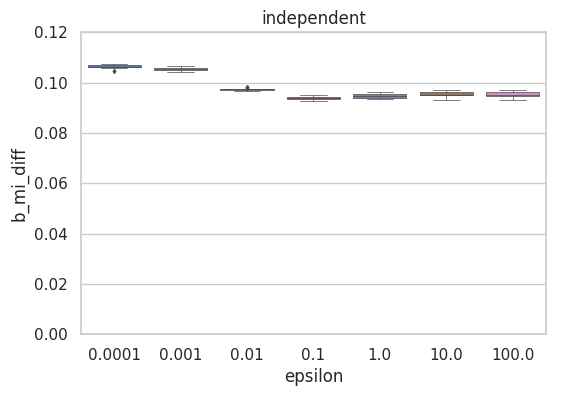

In [45]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(dpi=100)
plt.ylim(0, 0.12)
sns.boxplot(x='epsilon', y='b_mi_diff', data=b_df, linewidth=0.5, fliersize=2).set_title('independent');
#     plt.savefig('out/g3/pics/kl/comparison/eps%s' % str(i*10**-2) + '.png')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  after removing the cwd from sys.path.


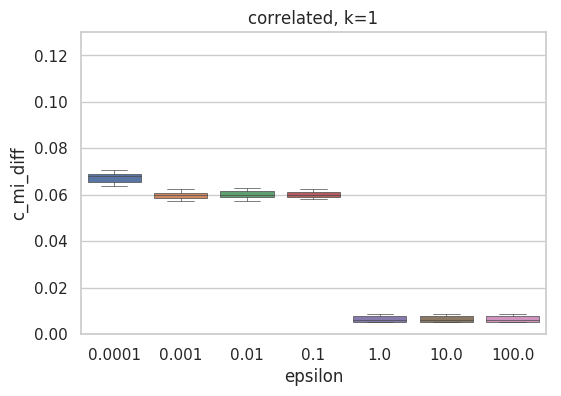

In [46]:
c_comparison = [('epsilon', epsilon_val),
                 ('c_mi_diff', c_flat)]

c_df = pd.DataFrame.from_items(c_comparison)

plt.figure(dpi=100)
plt.ylim(0, 0.13)
sns.boxplot(x='epsilon', y='c_mi_diff', data=c_df, linewidth=0.5, fliersize=2).set_title('correlated, k=1');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  after removing the cwd from sys.path.


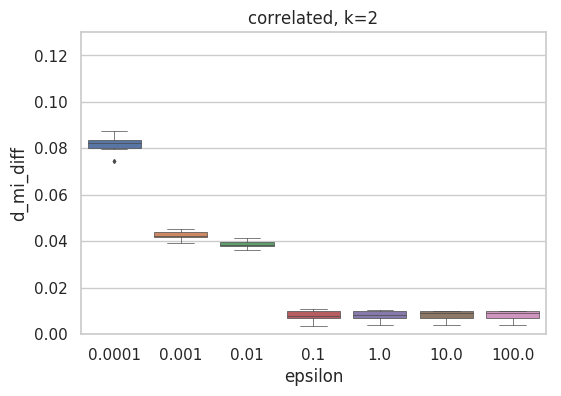

In [47]:
d_comparison = [('epsilon', epsilon_val),
                 ('d_mi_diff', d_flat)]

d_df = pd.DataFrame.from_items(d_comparison)

plt.figure(dpi=100)
plt.ylim(0, 0.13)
sns.boxplot(x='epsilon', y='d_mi_diff', data=d_df, linewidth=0.5, fliersize=2).set_title('correlated, k=2');

In [26]:
epsilon = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
path = 'out/g3/part_2/'
modes = ['b_fk/','c_fk/','d_fk/']
private_df = pd.read_csv('hw_data/hw_fake.csv')
private_mi = pairwise_attributes_mutual_information(private_df)
mode_ls = []
for mode in modes:
    eps_ls = []

    for eps in epsilon:
        total_ls = []

        for i in range(10):
            if mode == 'b_fk/':
                syn_df = pd.read_csv(path+str(mode)+'eps'+str(eps)+'_'+str(i)+'synthetic data(independent).csv')
#                 print (path+str(mode)+'eps'+str(eps)+'_'+str(i))
            elif mode == 'c_fk/':
                syn_df = pd.read_csv(path+str(mode)+'eps'+str(eps)+'_'+str(i)+'synthetic data(correlated).csv')
            else:
                syn_df = pd.read_csv(path+str(mode)+'eps'+str(eps)+'_'+str(i)+'synthetic data(ex_correlated).csv')
                print (path+str(mode)+'eps'+str(eps)+'_'+str(i))
            syn_mi = pairwise_attributes_mutual_information(syn_df)
            diff_mi = syn_mi - private_mi
            diff_mi = diff_mi.abs()
            total = diff_mi.values.sum()/2
            total_ls.append(total)
        eps_ls.append(total_ls)
    mode_ls.append(eps_ls)
        
#sensitive_data_file = pd.read_csv('hw_data/hw_compas.csv')
# private_mi = pairwise_attributes_mutual_information(sensitive_data_file)


out/g3/part_2/d_fk/eps0.0001_0
out/g3/part_2/d_fk/eps0.0001_1
out/g3/part_2/d_fk/eps0.0001_2
out/g3/part_2/d_fk/eps0.0001_3
out/g3/part_2/d_fk/eps0.0001_4
out/g3/part_2/d_fk/eps0.0001_5
out/g3/part_2/d_fk/eps0.0001_6
out/g3/part_2/d_fk/eps0.0001_7
out/g3/part_2/d_fk/eps0.0001_8
out/g3/part_2/d_fk/eps0.0001_9
out/g3/part_2/d_fk/eps0.001_0
out/g3/part_2/d_fk/eps0.001_1
out/g3/part_2/d_fk/eps0.001_2
out/g3/part_2/d_fk/eps0.001_3
out/g3/part_2/d_fk/eps0.001_4
out/g3/part_2/d_fk/eps0.001_5
out/g3/part_2/d_fk/eps0.001_6
out/g3/part_2/d_fk/eps0.001_7
out/g3/part_2/d_fk/eps0.001_8
out/g3/part_2/d_fk/eps0.001_9
out/g3/part_2/d_fk/eps0.01_0
out/g3/part_2/d_fk/eps0.01_1
out/g3/part_2/d_fk/eps0.01_2
out/g3/part_2/d_fk/eps0.01_3
out/g3/part_2/d_fk/eps0.01_4
out/g3/part_2/d_fk/eps0.01_5
out/g3/part_2/d_fk/eps0.01_6
out/g3/part_2/d_fk/eps0.01_7
out/g3/part_2/d_fk/eps0.01_8
out/g3/part_2/d_fk/eps0.01_9
out/g3/part_2/d_fk/eps0.1_0
out/g3/part_2/d_fk/eps0.1_1
out/g3/part_2/d_fk/eps0.1_2
out/g3/part_2/d_

In [29]:
b_fk = mode_ls[0]
c_fk = mode_ls[1]
d_fk = mode_ls[2]

# flatten the list
b_fk_flat = [val for sublist in b_fk for val in sublist]
c_fk_flat = [val for sublist in c_fk for val in sublist]
d_fk_flat = [val for sublist in d_fk for val in sublist]

In [30]:
epsilon_val = 10*[0.0001] + 10*[0.001] + 10*[0.01] + 10*[0.1]+ 10*[1]+10*[10] + 10*[100]

b_fk_comparison = [('epsilon', epsilon_val),
                 ('b_mi_diff', b_fk_flat)]

b_fk_df = pd.DataFrame.from_items(b_fk_comparison)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


In [357]:
b_fk_df.head()

,epsilon,b_mi_diff
0,0.0001,1.031989
1,0.0001,1.032135
2,0.0001,1.032513
3,0.0001,1.031825
4,0.0001,1.031987


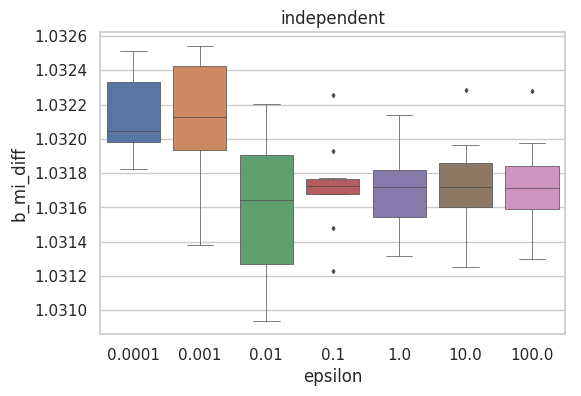

In [39]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(dpi=100)
# plt.ylim(0, 1.035)
sns.boxplot(x='epsilon', y='b_mi_diff', data=b_fk_df, linewidth=0.5, fliersize=2).set_title('independent');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  after removing the cwd from sys.path.


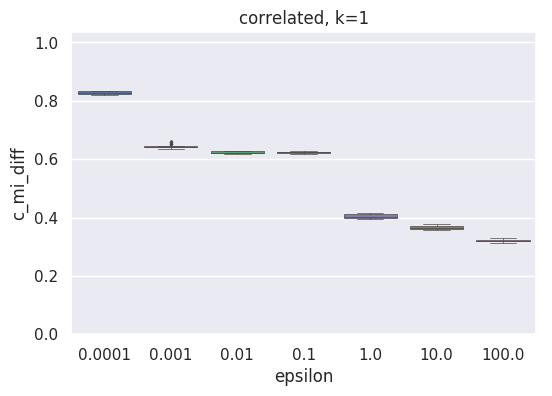

In [36]:
c_fk_comparison = [('epsilon', epsilon_val),
                 ('c_mi_diff', c_fk_flat)]

c_fk_df = pd.DataFrame.from_items(c_fk_comparison)

plt.figure(dpi=100)
plt.ylim(0, 1.035)
sns.boxplot(x='epsilon', y='c_mi_diff', data=c_fk_df, linewidth=0.5, fliersize=2).set_title('correlated, k=1');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  after removing the cwd from sys.path.


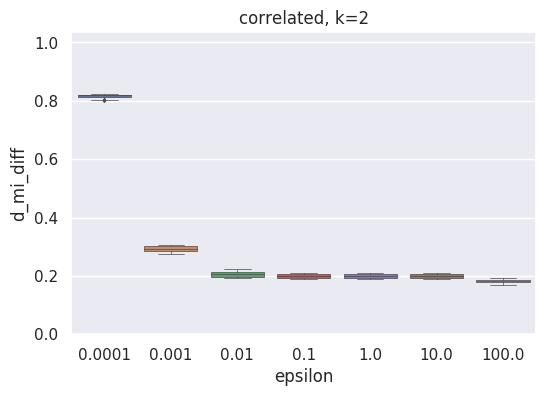

In [37]:
d_fk_comparison = [('epsilon', epsilon_val),
                 ('d_mi_diff', d_fk_flat)]

d_fk_df = pd.DataFrame.from_items(d_fk_comparison)

plt.figure(dpi=100)
plt.ylim(0, 1.035)
sns.boxplot(x='epsilon', y='d_mi_diff', data=d_fk_df, linewidth=0.5, fliersize=2).set_title('correlated, k=2');